In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from scipy.stats import shapiro, probplot
from sklearn.utils import resample
from scipy.stats import spearmanr
from matplotlib.colors import LinearSegmentedColormap

Load Data

In [2]:
#df = pd.read_csv("call_data_from_CAD.csv")
df = pd.read_csv("use_me_test.csv")
#Ensure proper formatting
df['Call_Zipcode'] = df['Call_Zipcode'].astype(str).str.replace(r'\.0$', '', regex=True)
df['Call_Created_Time'] = pd.to_datetime(df['Call_Created_Time'])
df['Date'] = df['Call_Created_Time'].dt.date
# df = df[(df['RespondingUnitCallSign'].isin(['3J79' ,'3J78', '3J77' ,'1J77', '4J79' ,'3J81' ,'3J76', '2J28', '2J29','CAHOT'])) | (df['PrimaryUnitCallSign'].isin(['3J79' ,'3J78', '3J77' ,'1J77', '4J79' ,'3J81' ,'3J76', '2J28', '2J29','CAHOT']))] 
# df['Call_Zipcode'] = df['Call_Zipcode'].astype(str).str.replace(r'\.0$', '', regex=True)

In [3]:
# df['Hour'] = df['Call_Created_Time'].dt.hour
# df['Year'] = df['Call_Created_Time'].dt.year
# df['Month'] = df['Call_Created_Time'].dt.month
#df['Date'] = df['Call_Created_Time'].dt.date
#df = df[~df["Year"].isin([2022, 2023])]

Identify unique zip codes, plot, and check for usefulness (contained in all years)

In [4]:
unique_zipcodes = df['Call_Zipcode'].unique()
num_zipcodes = len(unique_zipcodes)

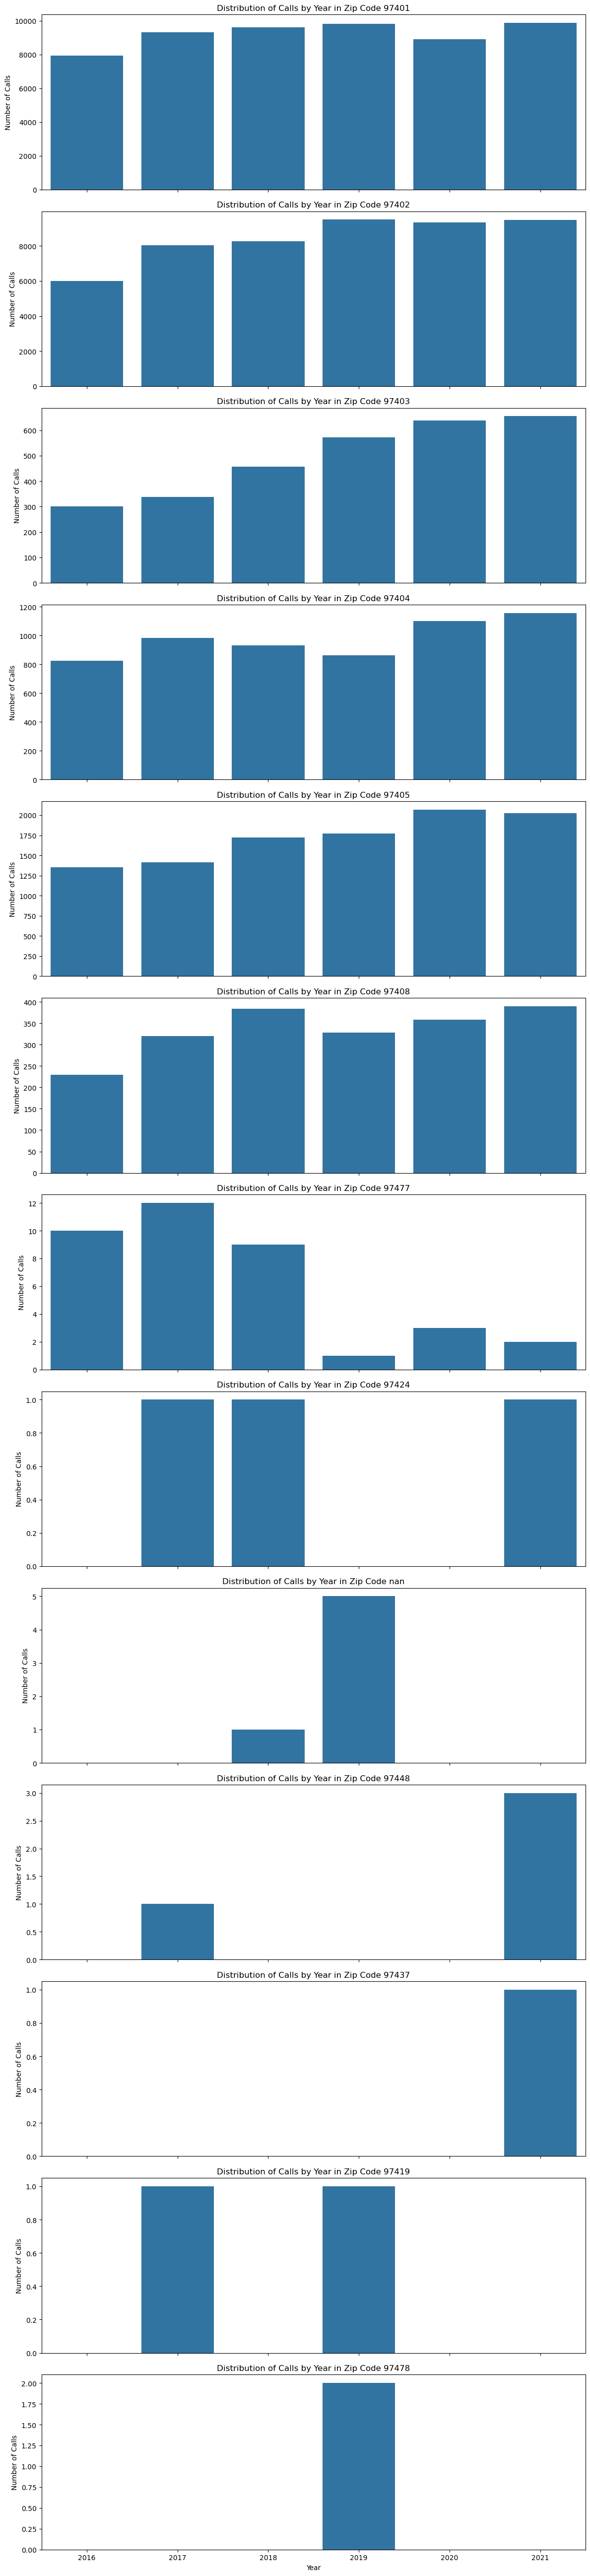

In [5]:
fig, axes = plt.subplots(nrows=num_zipcodes, ncols=1, figsize=(12, num_zipcodes * 4), sharex=True)

# Iterate through each zip code and plot the count of calls by year
for i, zipcode in enumerate(unique_zipcodes):
    ax = axes[i]
    zip_df = df[df['Call_Zipcode'] == zipcode]
    sns.countplot(data=zip_df, x='Year', ax=ax)
    ax.set_title(f'Distribution of Calls by Year in Zip Code {zipcode}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Calls')

plt.tight_layout()
plt.show()

In [6]:
excluded_zipcodes = ['97478', '97419', '97437', '97448', '97424', 'nan']
df = df[~df['Call_Zipcode'].isin(excluded_zipcodes) & df['Call_Zipcode'].notna()]

Insufficient data in 97478,97419,97437,97448,97424,nan, exclude these.

In [7]:
# df["Call_Zipcode"].unique()

Modify dataframe to exclude unusable zip codes

In [8]:
df = df[~df['Call_Zipcode'].isin(excluded_zipcodes) & df['Call_Zipcode'].notna()]
df["Call_Zipcode"].unique()

array(['97401', '97402', '97403', '97404', '97405', '97408', '97477'],
      dtype=object)

Plot Zip Code Distribution by Hour

Zip Code: 97401
min      961.000000
max     3425.000000
mean    2309.291667
std      814.391930
Zip Code: 97402
min      814.000000
max     3200.000000
mean    2107.625000
std      752.631951
Zip Code: 97403
min      60.000000
max     181.000000
mean    123.333333
std      33.131709
Zip Code: 97404
min      63.000000
max     440.000000
mean    244.333333
std     122.307050
Zip Code: 97405
min     137.000000
max     708.000000
mean    431.208333
std     195.905696
Zip Code: 97408
min      20.000000
max     144.000000
mean     83.750000
std      46.065407
Zip Code: 97477
min     1.000000
max     7.000000
mean    2.176471
std     1.629237


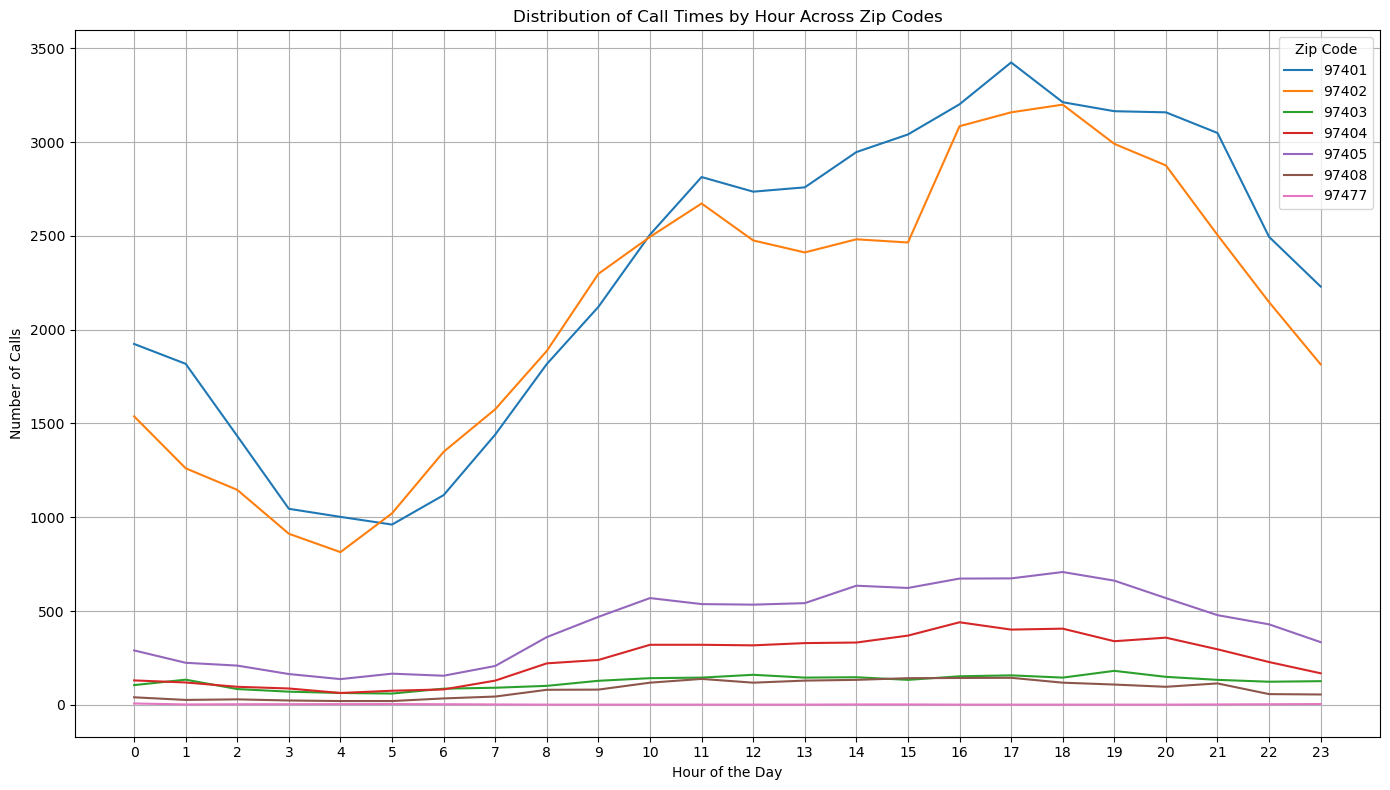

In [9]:
# Create a DataFrame to hold the count of calls by hour for each zip code
hourly_counts = df.groupby(['Call_Zipcode', 'Hour']).size().reset_index(name='Counts')

#Re-establish zip codes
unique_zipcodes = df["Call_Zipcode"].unique()

# Plot line plots
plt.figure(figsize=(14, 8))
for zipcode in unique_zipcodes:
    zip_df = hourly_counts[hourly_counts['Call_Zipcode'] == zipcode]
    sns.lineplot(data=zip_df, x='Hour', y='Counts', label=zipcode)
    desc_stats = zip_df['Counts'].describe()[['min', 'max', 'mean','std']]
    print(f"Zip Code: {zipcode}")
    print(desc_stats.to_string())

plt.title('Distribution of Call Times by Hour Across Zip Codes')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.legend(title='Zip Code')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Plot Zip Code Distribution by Month

Zip Code: 97401
min     4249.000000
max     5105.000000
mean    4618.583333
std      222.150423
Zip Code: 97402
min     4028.000000
max     4580.000000
mean    4215.250000
std      169.620499
Zip Code: 97403
min     221.000000
max     273.000000
mean    246.666667
std      16.494260
Zip Code: 97404
min     401.000000
max     558.000000
mean    488.666667
std      43.200028
Zip Code: 97405
min      711.000000
max     1012.000000
mean     862.416667
std       98.549903
Zip Code: 97408
min     137.000000
max     193.000000
mean    167.500000
std      17.707215
Zip Code: 97477
min     1.000000
max     6.000000
mean    3.083333
std     1.729862


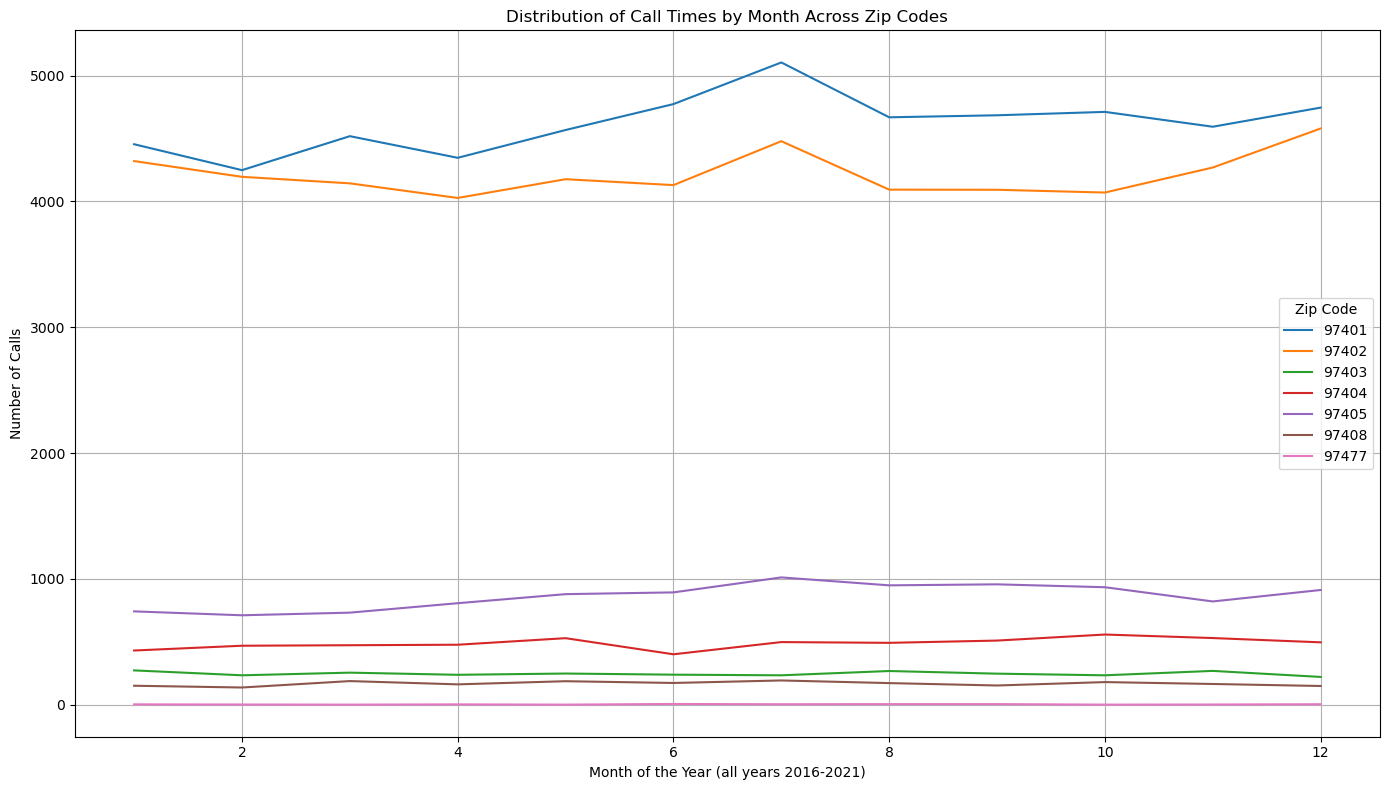

In [10]:
# Create a DataFrame to hold the count of calls by month for each zip code
monthly_counts = df.groupby(['Call_Zipcode', 'Month']).size().reset_index(name='Counts')

# # Normalize the counts to proportions for each zip code
# monthly_counts['Proportion'] = monthly_counts.groupby('Call_Zipcode')['Counts'].transform(lambda x: x / x.sum())

# Plot line plots
plt.figure(figsize=(14, 8))
for zipcode in unique_zipcodes:
    zip_df = monthly_counts[monthly_counts['Call_Zipcode'] == zipcode]
    sns.lineplot(data=zip_df, x='Month', y='Counts', label=zipcode)
    desc_stats = zip_df['Counts'].describe()[['min', 'max', 'mean','std']]
    print(f"Zip Code: {zipcode}")
    print(desc_stats.to_string())


plt.title('Distribution of Call Times by Month Across Zip Codes')
plt.xlabel('Month of the Year (all years 2016-2021)')
plt.ylabel('Number of Calls')
plt.legend(title='Zip Code')
#plt.xticks(range(0, 12))
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation analysis, using percent change day to day for year to year comparisons within each zip code

In [ ]:
# Count number of calls per day per zip code
calls_per_day_zip = df.groupby(['Date', 'Call_Zipcode']).size().unstack(fill_value=0)

# Calculate percentage change day over day for each zip code
calls_pct_change_zip = calls_per_day_zip.pct_change() * 100

# Reset the index to get a DataFrame
calls_pct_change_zip_df = calls_pct_change_zip.reset_index().melt(id_vars='Date', var_name='ZipCode', value_name='calls_pct_change')

# # Drop NaN values resulting from the percentage change calculation
# calls_pct_change_df = calls_pct_change_df.dropna()

# Extract year from the 'Date' column
calls_pct_change_zip_df['Year'] = pd.to_datetime(calls_pct_change_zip_df['Date']).dt.year

# Filter out February 29th records
calls_pct_change_zip_df = calls_pct_change_zip_df[~((pd.to_datetime(calls_pct_change_zip_df['Date']).dt.month == 2) & (pd.to_datetime(calls_pct_change_zip_df['Date']).dt.day == 29))]
# Function to calculate bootstrap confidence interval for Spearman correlation
def bootstrap_confidence_interval(data1, data2, n_bootstraps=1000, alpha=0.05):
    bootstrapped_corrs = []
    for _ in range(n_bootstraps):
        sample1, sample2 = resample(data1, data2)
        corr, _ = spearmanr(sample1, sample2)
        bootstrapped_corrs.append(corr)
    sorted_corrs = np.sort(bootstrapped_corrs)
    ci_lower = sorted_corrs[int((alpha/2) * n_bootstraps)]
    ci_upper = sorted_corrs[int((1 - alpha/2) * n_bootstraps)]
    return ci_lower, ci_upper

years = calls_pct_change_zip_df['Year'].unique()
#years = [year for year in years if year not in [2023, 2022]]

# Group the data by zip code
grouped = calls_pct_change_zip_df.groupby('ZipCode')

# Create multi-index DataFrames to store correlations and confidence intervals
correlations = pd.DataFrame(index=pd.MultiIndex.from_product([grouped.groups.keys(), years], names=['ZipCode', 'Year_i']), columns=years)
confidence_intervals = pd.DataFrame(index=pd.MultiIndex.from_product([grouped.groups.keys(), years], names=['ZipCode', 'Year_i']), columns=years)

# Create subplots
fig, axes = plt.subplots(len(years), len(years), figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot scatterplots and calculate correlations and confidence intervals for each zip code
for zipcode, group in grouped:
    for i, year_i in enumerate(years):
        for j, year_j in enumerate(years):
            if i != j:  # No need to plot a year against itself
                x_data = group[group['Year'] == year_i]['calls_pct_change'].fillna(0).values
                y_data = group[group['Year'] == year_j]['calls_pct_change'].fillna(0).values
                
                # Calculate correlation coefficient
                if len(x_data) > 0 and len(y_data) > 0:  # Ensure there is data to correlate
                    correlation, _ = spearmanr(x_data, y_data)
                    ci_lower, ci_upper = bootstrap_confidence_interval(x_data, y_data)
                    correlations.at[(zipcode, year_i), year_j] = correlation
                    confidence_intervals.at[(zipcode, year_i), year_j] = f'[{ci_lower:.2f}, {ci_upper:.2f}]'
                    
                    if zipcode == list(grouped.groups.keys())[0]:  # Only plot for the first zip code
                        axes[i, j].scatter(x_data, y_data, alpha=0.5)
                        axes[i, j].set_xlabel(f'{year_i} (%)')
                        axes[i, j].set_ylabel(f'{year_j} (%)')
                        axes[i, j].set_title(f'{year_i} vs {year_j}\nCorrelation: {correlation:.2f}\nCI: [{ci_lower:.2f}, {ci_upper:.2f}]')

# Remove diagonal subplots
for i in range(len(years)):
    for j in range(len(years)):
        if i == j:
            fig.delaxes(axes[i, j])
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlations)

# Display the confidence intervals matrix
print("\nConfidence Intervals Matrix:")
print(confidence_intervals)



In [ ]:
# # Function to calculate bootstrap confidence interval for Spearman correlation
# def bootstrap_confidence_interval(data1, data2, n_bootstraps=1000, alpha=0.05):
#     bootstrapped_corrs = []
#     for _ in range(n_bootstraps):
#         sample1, sample2 = resample(data1, data2)
#         corr, _ = spearmanr(sample1, sample2)
#         bootstrapped_corrs.append(corr)
#     sorted_corrs = np.sort(bootstrapped_corrs)
#     ci_lower = sorted_corrs[int((alpha/2) * n_bootstraps)]
#     ci_upper = sorted_corrs[int((1 - alpha/2) * n_bootstraps)]
#     return ci_lower, ci_upper

# years = calls_pct_change_zip_df['Year'].unique()
# years = [year for year in years if year not in [2023, 2022]]

# # Group the data by zip code
# grouped = calls_pct_change_zip_df.groupby('ZipCode')

# # Create multi-index DataFrames to store correlations and confidence intervals
# correlations = pd.DataFrame(index=pd.MultiIndex.from_product([grouped.groups.keys(), years], names=['ZipCode', 'Year_i']), columns=grouped.groups.keys())
# confidence_intervals = pd.DataFrame(index=pd.MultiIndex.from_product([grouped.groups.keys(), years], names=['ZipCode', 'Year_i']), columns=grouped.groups.keys())

# # Create subplots
# fig, axes = plt.subplots(len(grouped.groups.keys()), len(grouped.groups.keys()), figsize=(15, 15))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)

# # Plot scatterplots and calculate correlations and confidence intervals for each zip code
# for i, (zipcode_i, group_i) in enumerate(grouped):
#     for j, (zipcode_j, group_j) in enumerate(grouped):
#         if i != j:  # No need to plot a zip code against itself
#             x_data = group_i['calls_pct_change'].fillna(0).values
#             y_data = group_j['calls_pct_change'].fillna(0).values
            
#             # Calculate correlation coefficient
#             if len(x_data) > 0 and len(y_data) > 0:  # Ensure there is data to correlate
#                 correlation, _ = spearmanr(x_data, y_data)
#                 ci_lower, ci_upper = bootstrap_confidence_interval(x_data, y_data)
#                 correlations.at[(zipcode_i, 'all_years'), zipcode_j] = correlation
#                 confidence_intervals.at[(zipcode_i, 'all_years'), zipcode_j] = f'[{ci_lower:.2f}, {ci_upper:.2f}]'
                
#                 axes[i, j].scatter(x_data, y_data, alpha=0.5)
#                 axes[i, j].set_xlabel(f'{zipcode_i} (%)')
#                 axes[i, j].set_ylabel(f'{zipcode_j} (%)')
#                 axes[i, j].set_title(f'{zipcode_i} vs {zipcode_j}\nCorrelation: {correlation:.2f}\nCI: [{ci_lower:.2f}, {ci_upper:.2f}]')

# # Remove diagonal subplots
# for i in range(len(grouped.groups.keys())):
#     for j in range(len(grouped.groups.keys())):
#         if i == j:
#             fig.delaxes(axes[i, j])
# plt.tight_layout()
# plt.show()

# # Display the correlation matrix
# print("Correlation Matrix:")
# print(correlations)

# # Display the confidence intervals matrix
# print("\nConfidence Intervals Matrix:")
# print(confidence_intervals)